In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score



# Load Dadaset

In [32]:
# Load the CSV file into a DataFrame

csv_file = 'Heart_Disease_Dataset.csv'

data = pd.read_csv(csv_file)
print(f"Data Shape: {data.shape}")

Data Shape: (1190, 12)


# Check for NAN value

In [33]:
has_nan=np.isnan(data).any().all()

if has_nan:
    print("There are NaN values in the dataset.")
    # Find the rows with NaN values
    nan_mask = data.isna().any(axis=1)
    rows_with_nan = data[nan_mask]
    indices_of_rows_with_nan = rows_with_nan.index
    print(f"Rows with NaN: {indices_of_rows_with_nan}")

else:
    print("There are no NaN values in the dataset.")

There are no NaN values in the dataset.


# Class Distribution

target
1    629
0    561
Name: count, dtype: int64
The dataset is balanced.


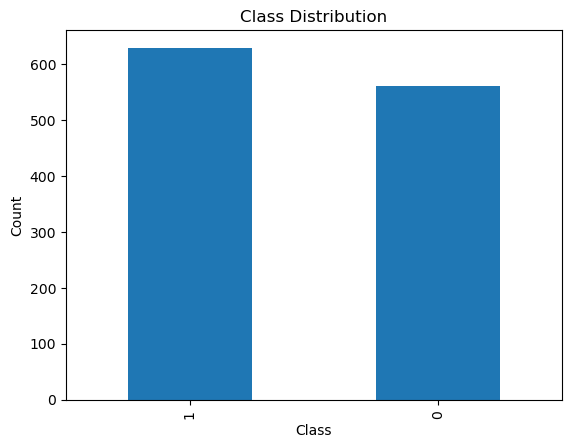

In [68]:
class_counts = data['target'].value_counts()
print(class_counts)

if (class_counts[0]/class_counts[1])<1.15 or (class_counts[0]/class_counts[1])>0.85:
    print("The dataset is balanced.")
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Distribution of feature in each class

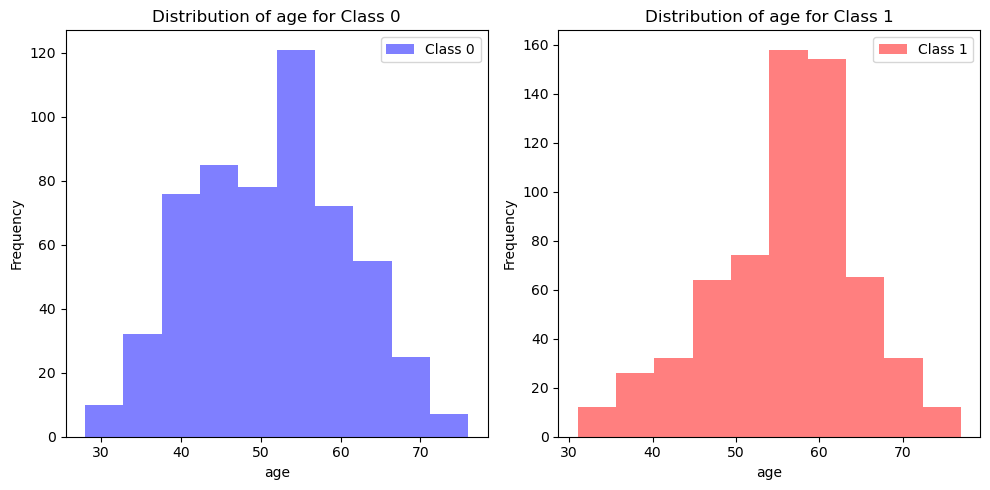

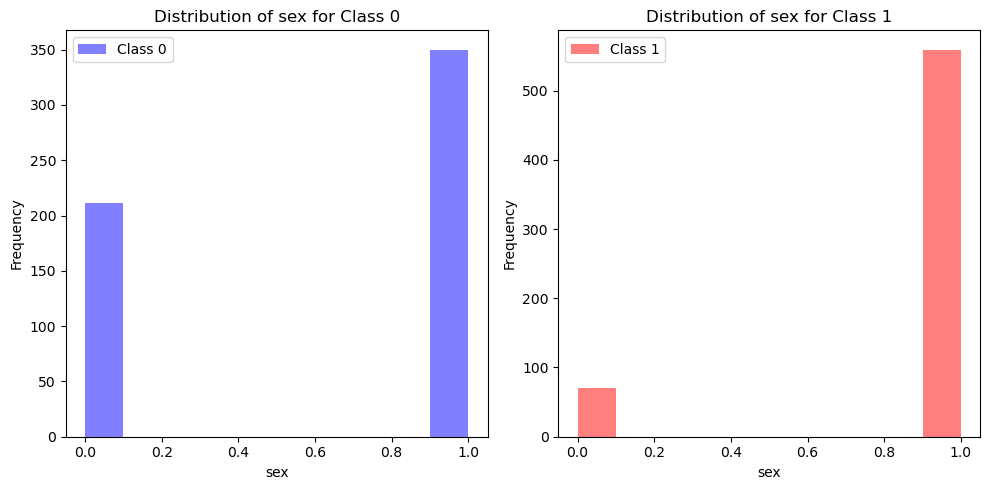

In [35]:
def class_distribution_by_feature(data, feature):
    # Separate the data into two classes
    class_0 = data[data['target'] == 0]
    class_1 = data[data['target'] == 1]
    
    # Create histograms for each class
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(class_0[feature], bins=10, color='blue', alpha=0.5, label='Class 0')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of {feature} for Class 0')

    plt.subplot(1, 2, 2)
    plt.hist(class_1[feature], bins=10, color='red', alpha=0.5, label='Class 1')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'Distribution of {feature} for Class 1')

    plt.tight_layout()
    plt.show()

class_distribution_by_feature(data, 'age')
class_distribution_by_feature(data, 'sex')



# Clean the dataset

In [36]:
X=data.drop('target', axis=1)
y=data['target']
threshold = 3

# Normalize X using Z-score
X_norm = abs(stats.zscore(X))

# Find the indices of the outliers
outlier_indices = []
for i in range(X_norm.shape[0]):
    if not (X_norm.iloc[i]< threshold).all():
        outlier_indices.append(i)


# Remove outliers based on the threshold
X_no_outliers = X[(X_norm < threshold).all(axis=1)]
y_no_outliers = y.drop(outlier_indices)


print("Number of outliers removed:", len(outlier_indices))
print("Indices of outliers removed:", outlier_indices)
print(X_no_outliers.shape)

Number of outliers removed: 28
Indices of outliers removed: [30, 76, 109, 149, 167, 242, 325, 366, 371, 391, 400, 450, 593, 618, 704, 734, 761, 773, 793, 852, 978, 1010, 1013, 1039, 1070, 1075, 1078, 1172]
(1162, 11)


# Split and Normalize the dataset 

In [37]:
# Split the data into training and testing sets
X_pd= pd.DataFrame(X_no_outliers, columns=X_no_outliers.columns)

X_train, X_test, y_train, y_test = train_test_split(X_pd, y_no_outliers, test_size=0.3, random_state=42)

X_train=MinMaxScaler().fit_transform(X_train)
X_test=MinMaxScaler().fit_transform(X_test)

# SVM

SVM with linear Kernel

In [64]:
svm_classifier = SVC(kernel='linear',C=0.06)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# Calculate precision, recall, and F1-score and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Linear kernel")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Linear kernel
Accuracy: 0.836676217765043
Precision: 0.8690476190476191
Recall: 0.8066298342541437
F1-Score: 0.8366762177650431


In [39]:
svm_classifier = SVC(kernel='rbf',gamma=2)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# Calculate precision, recall, and F1-score and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("RBF kernel")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)





RBF kernel
Accuracy: 0.8653295128939829
Precision: 0.8722222222222222
Recall: 0.8674033149171271
F1-Score: 0.8698060941828255


In [40]:
svm_classifier = SVC(kernel='poly', degree=3,C=10)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

# Calculate precision, recall, and F1-score and accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Poⅼynoⅿinaⅼ kernel")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)



Poⅼynoⅿinaⅼ kernel
Accuracy: 0.8538681948424068
Precision: 0.891566265060241
Recall: 0.8176795580110497
F1-Score: 0.8530259365994235
